In [2]:
import pandas as pd
arrivals_df = pd.read_csv('arrivals_2018-19_cleaned.csv')

Series:  1D data structure comprised of key-value pairs. Think of it as a single list.

### Series Constructor and Parameters:
`pandas.Series(data, index, dtype, copy)`  
       index : index to use for Series. Doesn't have to be unique (ex: ["a", "b", "a"])
       dtype : data type (int, string, etc.)  
       copy  : bool. if true, new series returned. Default: copy=true


In [20]:
# example:
data = [10,12,14,16]    # list object
s = pd.Series(data)
print ("Series:\n", s)

Series:
 0    10
1    12
2    14
3    16
dtype: int64


In [22]:
s = pd.Series(data, index=[95,96,'a',98])
print ("Series with custom indexing:")
print (s)

Series with custom indexing:
95    10
96    12
a     14
98    16
dtype: int64


In [23]:
qbRatings = {'Brady' : 100, 'Manning' : 95, 'Zach Wilson' : 24} # dictionary
s = pd.Series(qbRatings)
print ("Series made from dictionary")
print (s)

Series made from dictionary
Brady          100
Manning         95
Zach Wilson     24
dtype: int64


### Dataframes

2D data structure. Collection of two or more series with common indices. Think of it as a list of lists  
`pandas.DataFrame(data, index, columns, dtype, copy)`  

In [5]:
#nested list with 3 sublists. Each sublist has info on name, age, and danger rating
contacts = [['Joe Goldberg', 34, 95], ['Guinevere Beck', 30, 12], ['Walter White', 52, 90]]
df1 = pd.DataFrame(contacts, columns=['Name', 'Age', 'Danger Rating'])
print(df1)

             Name  Age  Danger Rating
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90


# Reading in data

`df = pd.read_csv('tomBradyStats.csv')`  
`df = pd.read_excel('expenseList2022.xlsx')`  
`df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json"`


In [6]:
# Ignore Index Parameter for Concatenation (COME BACK TO THIS)
# setting it to false means Pandas keeps original index values from two different input dataframes
# If set to true, the concatenation will ignore existing indices

# example
contacts2 = [['Boss Baby', 0.5, 45], ['Thor', 829, 99]]
df2 = pd.DataFrame(contacts, columns=['Name', 'Age', 'Danger Rating'])
df = pd.concat ([df1, df2], ignore_index=False)
print(df)

             Name  Age  Danger Rating
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90
0    Joe Goldberg   34             95
1  Guinevere Beck   30             12
2    Walter White   52             90


### Explore the Data:

| Command               | Meaning|
| --------              |--------|
|`df.head(n=10)`        | print first n rows, default is 5|
|`df.tail(n=10)`        | print last n rows, default is 5|
|`df.columns.tolist()`  |print list of column headers  <br />_Add .tolist() to convert object output to list_|
|`df.info()`     |print non-null count and data type of each column|
|`df.describe()` |print descriptive statistics (mean, median, percentiles, etc|
|`print(df.dtypes)`     |print datatype of each column|
|`df.shape`             | output number of rows, columns|


### Clean Dataset
1. If large dataset with few empty cells, can remove rows with empty cells.  
    - `New_df = df.dropna()` → drop nan values, put them in new_df   
    - `df.dropna(inplace = True)` → dop nan values in same dataframe
2. Replace empty values with new value  
    - `df.fillna(130, inplace=True)` → all empty cells in DF
    - `df[“Calories].fillna(130, inplace=True)`  
3. Replace empty values with mean/median/mode  
    - `df['salary'].fillna(df['salary'].mean(), inplace=True)`  

1. Replace outliers by either replacing value, or omitting row
    - `for x in df.index:`  
	        > `if df.loc[x,”Duration”] > 120:`  
            >>   `df.loc[x,"Duration"] = 120`  
2. Delete duplicate rows
    - `print(df.duplicated())` `drop_duplicates(inplace = True)`
3. Convert data in specific cells to correct format.
    - `to_datetime`: function which converts to datetime format.  
        - ex: `df['date'] = pd.to_datetime(df['date'])`
        - ex: `df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')` :  
        Specifies format of current dates (dd-mm-yyyy)
4. Rename columns 
    - `df.rename(columns={'old_name': 'new_name'}, inplace=True)`
5. Replace incorrect data
    - `df['col_name'].replace('incorrect_value', 'correct_value', inplace=True)`
    - `df.at[row_number, col_name] = 'new_val'`
6. Check for outliers
    - `df.boxplot(column=['arr_cancelled'])`







<AxesSubplot:>

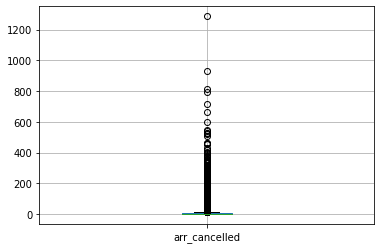

In [16]:
arrivals_df.boxplot(column=['arr_cancelled'])

# Notice the outliers!

### Indexing and Selecting Data

Goal: select subsets of data from a dataframe or series based on label or integer location  
`.loc()` : label based (select rows/columns using their labels)  
`.iloc()`: integer based (select using integer index)  

`.groupby()`: split data into groups based on criteria


In [24]:
#Return value present in the 'arr_cancelled' column for row #789
arrivals_df.loc[789,'arr_cancelled']

21.0

In [8]:
gc = arrivals_df.groupby('carrier_name')

#print first entries in all the groups formed
gc.first()

,date,carrier,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
carrier_name,,,,,,,,,,,,,,,,,,,
Alaska Airlines Inc.,2018-1,AS,ABQ,"Albuquerque, NM: Albuquerque International Sun...",2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allegiant Air,2018-1,G4,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",59.0,13.0,3.69,0.00,2.36,0.00,6.95,0.0,0.0,711.0,253.0,0.0,52.0,0.0,406.0
American Airlines Inc.,2018-1,AA,ABQ,"Albuquerque, NM: Albuquerque International Sun...",139.0,18.0,6.92,1.80,4.76,0.00,4.52,1.0,0.0,1033.0,389.0,71.0,272.0,0.0,301.0
Delta Air Lines Inc.,2018-1,DL,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",30.0,3.0,1.00,0.94,1.00,0.00,0.06,0.0,0.0,222.0,37.0,143.0,33.0,0.0,9.0
Endeavor Air Inc.,2018-1,9E,ABY,"Albany, GA: Southwest Georgia Regional",83.0,10.0,3.60,0.98,1.51,0.00,3.91,3.0,0.0,685.0,106.0,240.0,43.0,0.0,296.0
Envoy Air,2018-1,MQ,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,0.00,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0
ExpressJet Airlines Inc.,2018-1,EV,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",36.0,11.0,5.60,0.00,1.54,0.00,3.86,0.0,0.0,984.0,608.0,0.0,26.0,0.0,350.0
ExpressJet Airlines LLC,2019-4,EV,ABQ,"Albuquerque, NM: Albuquerque International Sun...",8.0,1.0,0.00,0.00,1.00,0.00,0.00,3.0,0.0,16.0,0.0,0.0,16.0,0.0,0.0
Frontier Airlines Inc.,2018-1,F9,ABQ,"Albuquerque, NM: Albuquerque International Sun...",33.0,1.0,0.71,0.00,0.00,0.00,0.29,1.0,0.0,35.0,25.0,0.0,0.0,0.0,10.0


In [11]:
# Find all entries contained in the 'JetBlue Airways' group
gc.get_group('JetBlue Airways')

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1119,2018-1,B6,JetBlue Airways,ABQ,"Albuquerque, NM: Albuquerque International Sun...",19.0,1.0,0.38,0.00,0.00,0.00,0.62,1.0,0.0,52.0,20.0,0.0,0.0,0.0,32.0
1120,2018-1,B6,JetBlue Airways,ALB,"Albany, NY: Albany International",62.0,13.0,7.34,0.00,1.44,0.00,4.22,1.0,0.0,841.0,572.0,0.0,57.0,0.0,212.0
1121,2018-1,B6,JetBlue Airways,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",147.0,41.0,16.73,0.79,12.53,0.07,10.88,8.0,1.0,2381.0,1283.0,85.0,437.0,2.0,574.0
1122,2018-1,B6,JetBlue Airways,AUS,"Austin, TX: Austin - Bergstrom International",186.0,55.0,23.77,1.89,13.70,0.32,15.32,7.0,0.0,4674.0,2204.0,275.0,560.0,41.0,1594.0
1123,2018-1,B6,JetBlue Airways,BDL,"Hartford, CT: Bradley International",313.0,92.0,47.47,2.07,11.75,0.00,30.71,17.0,1.0,6906.0,3608.0,311.0,463.0,0.0,2524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40503,2019-1,B6,JetBlue Airways,STT,"Charlotte Amalie, VI: Cyril E King",62.0,17.0,5.75,0.00,0.57,0.00,10.69,1.0,0.0,1780.0,830.0,0.0,47.0,0.0,903.0
40504,2019-1,B6,JetBlue Airways,STX,"Christiansted, VI: Henry E. Rohlsen",7.0,3.0,1.83,0.00,0.14,0.16,0.87,0.0,0.0,156.0,84.0,0.0,8.0,5.0,59.0
40505,2019-1,B6,JetBlue Airways,SWF,"Newburgh/Poughkeepsie, NY: New York Stewart In...",62.0,24.0,12.88,1.00,1.61,0.39,8.11,2.0,0.0,2647.0,1502.0,25.0,107.0,63.0,950.0
40506,2019-1,B6,JetBlue Airways,SYR,"Syracuse, NY: Syracuse Hancock International",147.0,50.0,24.91,1.19,6.08,0.18,17.64,9.0,2.0,4140.0,2095.0,174.0,176.0,15.0,1680.0


In [13]:
# Use groupby() to form groups based on more than one category

gca = arrivals_df.groupby(['airport', ''])
gca.head()

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,0.00,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0
1,2018-1,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,0.00,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0
2,2018-1,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,0.00,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0
3,2018-1,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",63.0,11.0,1.75,1.08,2.98,0.00,5.19,3.0,0.0,657.0,83.0,34.0,130.0,0.0,410.0
4,2018-1,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",31.0,12.0,0.82,3.00,6.62,0.00,1.55,0.0,0.0,484.0,27.0,136.0,207.0,0.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41087,2019-1,MQ,Envoy Air,PIT,"Pittsburgh, PA: Pittsburgh International",261.0,82.0,11.59,3.76,26.62,0.00,40.03,12.0,0.0,4068.0,494.0,119.0,907.0,0.0,2548.0
41091,2019-1,MQ,Envoy Air,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",252.0,78.0,14.11,0.00,26.25,0.13,37.50,6.0,0.0,4495.0,755.0,0.0,990.0,10.0,2740.0
41092,2019-1,MQ,Envoy Air,RIC,"Richmond, VA: Richmond International",195.0,68.0,12.12,1.87,17.97,0.00,36.04,22.0,0.0,4138.0,603.0,196.0,780.0,0.0,2559.0
41093,2019-1,MQ,Envoy Air,ROA,"Roanoke, VA: Roanoke Blacksburg Regional Woodr...",52.0,14.0,2.74,0.69,2.46,0.00,8.11,2.0,1.0,726.0,323.0,31.0,112.0,0.0,260.0
